In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
plt.style.use("seaborn")
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage[cm]{sfmath}'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'cm'

In [2]:
experiment_id = "4zTKE4RpQ9e2Pd7qh9uX0Q"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars(pivot=False)

In [3]:
print(df.head(2))
print(df["tag"].unique())

             run    tag  step  value
0  CNN/version_0  epoch    49    0.0
1  CNN/version_0  epoch    99    0.0
['epoch' 'train_loss' 'val_acc' 'val_loss']


In [4]:
cnn_step = df[(df["tag"]=="val_acc")&(df["run"].str.contains("CNN/"))]["step"]
cnn_acc = df[(df["tag"]=="val_acc")&(df["run"].str.contains("CNN/"))]["value"]
lcn_step = df[(df["tag"]=="val_acc")&(df["run"].str.contains("LCN/"))]["step"]
lcn_acc = df[(df["tag"]=="val_acc")&(df["run"].str.contains("LCN/"))]["value"]
fcn_step = df[(df["tag"]=="val_acc")&(df["run"].str.contains("FCN/"))]["step"]
fcn_acc = df[(df["tag"]=="val_acc")&(df["run"].str.contains("FCN/"))]["value"]

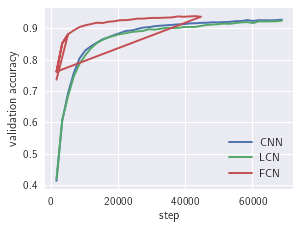

In [5]:
fig, ax =plt.subplots(1,1,figsize=(4,3),dpi=80)
plt.plot(cnn_step,cnn_acc,label="CNN")
plt.plot(lcn_step,lcn_acc,label="LCN")
plt.plot(fcn_step,fcn_acc,label="FCN")
plt.legend()
plt.xlabel("step")
plt.ylabel("validation accuracy")
plt.show()